# Example usage of EMRISur1dq1e4 surrogate model.

Notebook author: Tousif Islam (tislam@umassd.edu)

Contact: Tousif Islam (tislam@umassd.edu), Scott Field (sfield@umassd.edu), Vijay Varma (vijay.varma392@gmail.com)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import gwsurrogate as gws

lal.G_SI != G
lal.MSUN_SI != Msun
setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work


/home/UMDAR.UMASSD.EDU/tislam/anaconda3/lib/python3.7/site-packages/gwtools/rotations.py:63: UserWarning: Could not import GWFrames, needed for rotations module
  _warnings.warn("Could not import GWFrames, needed for rotations module")
/home/UMDAR.UMASSD.EDU/tislam/anaconda3/lib/python3.7/site-packages/gwtools/__init__.py:11: UserWarning: Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.
  _warnings.warn("Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.")


## Download surrogate data, this only needs to be done once

In [2]:
# This can take a few minutes
gws.catalog.pull('EMRISur1dq1e4')


EMRISur1dq1e4.h5 file exits, moving to /home/UMDAR.UMASSD.EDU/tislam/anaconda3/lib/python3.7/site-packages/gwsurrogate/surrogate_downloads/backup/2020Nov17_15h:38m:28s_EMRISur1dq1e4.h5.


'/home/UMDAR.UMASSD.EDU/tislam/anaconda3/lib/python3.7/site-packages/gwsurrogate/surrogate_downloadsEMRISur1dq1e4.h5'

## Load the surrogate, this only needs to be done once at the start of a script

In [3]:
import sys
path_to_gws = '/home/UMDAR.UMASSD.EDU/tislam/gwsurrogate/gwsurrogate/'
sys.path.append(path_to_gws)
path_to_surrogate = path_to_gws+'surrogate_downloads/EMRISur1dq1e4.h5'
model = gws.EvaluateSurrogate(path_to_surrogate, ell_m=[(2,2),(2,1),(3,1),(3,2),(3,3),(4,2),(4,3),(4,4),(5,3),(5,4),(5,5)]) 

loading surrogate mode... l2_m2

>>> Found surrogate ID from file name: EMRISur1dq1e4

>>> Warning: Guessing quadrature weights to be identical with 0.049805
Cannot load greedy points...OK
Cannot load eim points...OK
Special case: using spline for parametric model at each EI node
spline knots = 41, num_fits = 10
setting norm fitparams to None...
loading surrogate mode... l2_m1

>>> Found surrogate ID from file name: EMRISur1dq1e4

>>> Warning: Guessing quadrature weights to be identical with 0.049805
Cannot load greedy points...OK
Cannot load eim points...OK
Special case: using spline for parametric model at each EI node
spline knots = 41, num_fits = 10
setting norm fitparams to None...
loading surrogate mode... l3_m1

>>> Found surrogate ID from file name: EMRISur1dq1e4

>>> Warning: Guessing quadrature weights to be identical with 0.049805
Cannot load greedy points...OK
Cannot load eim points...OK
Special case: using spline for parametric model at each EI node
spline knots = 41, num_

## Read the documentation

In [4]:
help(model)

Help on EvaluateSurrogate in module gwsurrogate.surrogate object:

class EvaluateSurrogate(builtins.object)
 |  EvaluateSurrogate(path, deg=3, ell_m=None, excluded='DEFAULT', use_orbital_plane_symmetry=True)
 |  
 |  Evaluate multi-mode surrogates
 |  
 |  Methods defined here:
 |  
 |  __call__(self, q, M=None, dist=None, theta=None, phi=None, z_rot=None, f_low=None, times=None, units='dimensionless', ell=None, m=None, mode_sum=True, fake_neg_modes=True)
 |      Return surrogate evaluation for...
 |      
 |      INPUT
 |      =====
 |      q              --- binary parameter values EXCLUDING total mass M.
 |                         In 1D, mass ratio (dimensionless) must be supplied.
 |                         In nD, the surrogate's internal parameterization is assumed.
 |      M              --- total mass (solar masses) 
 |      dist           --- distance to binary system (megaparsecs)
 |      theta/phi      --- evaluate hp and hc modes at this location on sphere
 |      z_rot     

## Evaluate the waveform

### Evaluate waveform modes in dimensionless units (default)

You have evaluated the (2,2) mode


/home/UMDAR.UMASSD.EDU/tislam/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


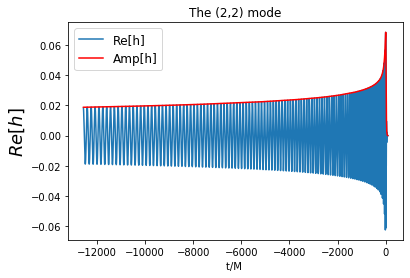

In [5]:
# Evaluate and plot the 2,2 mode. 
# By default, the modes are evaluated on the sphere, and negative modes are generated from 
# known relationships. So we need to set both options to false to get only the (2,2) mode.
modes, times, hp, hc = model(q=20, ell=[2], m=[2], mode_sum=False, fake_neg_modes=False)
print('You have evaluated the (%i,%i) mode'%(modes[0][0],modes[0][1]))

plt.plot(times, hp, label='Re[h]')
plt.plot(times,abs(hp+1j*hc),'r', label='Amp[h]')
plt.title('The (%i,%i) mode'%(modes[0][0],modes[0][1]))
plt.ylabel('$Re[h]$', fontsize=18)
plt.xlabel('t/M ')
plt.legend(fontsize=12)
plt.show()

### Evaluate waveform modes in physical units

You have evaluated the (2,2) mode in physical unit


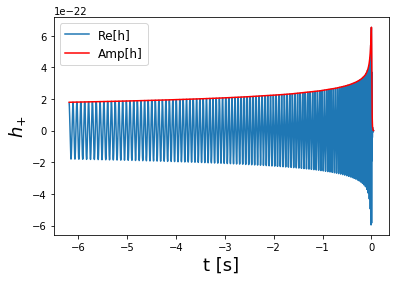

In [6]:
mass=100 # Total masss in solar masses
dist_mpc=500 # distance in megaparsec

modes, times, hp, hc = model(q=20, M=mass, dist=dist_mpc, ell=[2], m=[2], mode_sum=False, fake_neg_modes=False)
print('You have evaluated the (%i,%i) mode in physical unit'%(modes[0][0],modes[0][1]))

plt.plot(times, hp, label='Re[h]')
plt.plot(times,abs(hp+1j*hc),'r', label='Amp[h]')
plt.ylabel('$h_{+}$', fontsize=18)
plt.xlabel('t [s]', fontsize=18)
plt.legend(fontsize=12)
plt.show()

### Evaluate waveform at a point on the sky

You have evaluated the (2,2) mode in physical unit


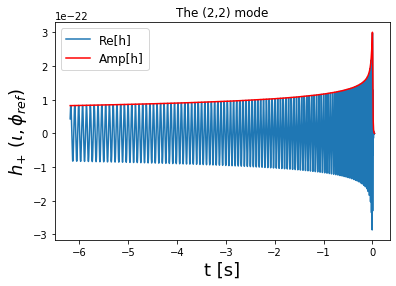

In [7]:
mass=100 # Total masss in solar masses
dist_mpc=500 # distance in megaparsec
inclination = np.pi/4 
phi_ref = np.pi/5

modes, times, hp, hc = model(q=20, M=mass, dist=dist_mpc, theta=inclination, phi=phi_ref, ell=[2], m=[2], mode_sum=False, fake_neg_modes=False)
print('You have evaluated the (%i,%i) mode in physical unit'%(modes[0][0],modes[0][1]))

plt.plot(times, hp, label='Re[h]')
plt.plot(times,abs(hp+1j*hc),'r', label='Amp[h]')
plt.title('The (%i,%i) mode'%(modes[0][0],modes[0][1]))
plt.xlabel('t [s]', fontsize=18)
plt.ylabel('$h_{+}$ $(\iota, \phi_{ref})$', fontsize=18)
plt.legend(fontsize=12)
plt.show()